# Section 5: Basic probability and statistical analysis using SciPy

In [2]:
pip install scipy

104.80s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.8/29.8 MB 12.2 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
from scipy import stats

In [8]:
num_heads = 16
num_flips = 20
prob_head = 0.5
prob = stats.binom_test(num_heads, num_flips, prob_head)
print(f'Probability of observing more than 15 heads or 15 tails is {prob}')

Probability of observing more than 15 heads or 15 tails is 0.01181793212890625
0.01181793212890625


/var/folders/rk/qwqd81bx00b1rl2fj8gy_vnc0000gn/T/ipykernel_72370/4268563943.py:4: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  prob = stats.binom_test(num_heads, num_flips, prob_head)


In [9]:
# Computing an exact probability using stats.binom.pmf
prob_16_heads = stats.binom.pmf(16, num_flips, prob_head)
print(f'Probability of observing {num_heads} of {num_flips} is {prob_16_heads}')

Probability of observing 16 of 20 is 0.004620552062988286


In [10]:
# Computing an array of probabilities using stats.binom.pmf
probabilities = stats.binom.pmf([4, 16], num_flips, prob_head)
assert probabilities.tolist() == [prob_16_heads] * 2

In [16]:
# Computing an interval probability using stats.binom.pmf
# Passing a range to stats.binom.pmf returns an array of probabilities across the interval of all possible head counts
interval_all_counts = range(21)
probabilities = stats.binom.pmf(interval_all_counts, num_flips, prob_head)
total_prob = probabilities.sum()
print(f'Total sum of probabilities equals {total_prob}')

Total sum of probabilities equals 1.0000000000000002


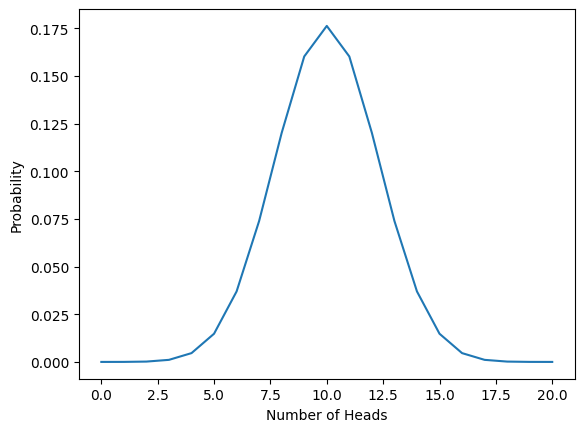

In [17]:
# Plotting a 20-coin-flip binomial distribution
import matplotlib.pyplot as plt
plt.plot(interval_all_counts, probabilities)
plt.xlabel('Number of Heads')
plt.ylabel('Probability')
plt.show()

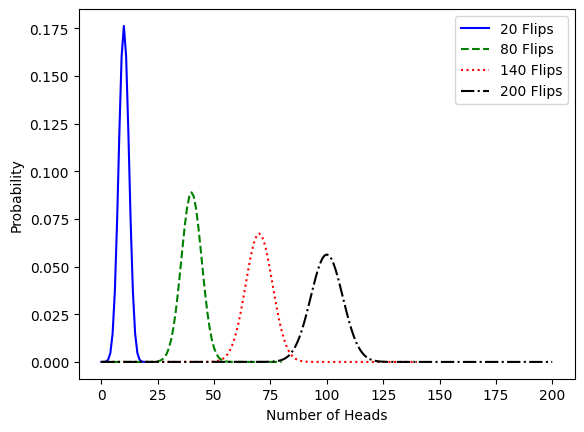

In [20]:
# Plotting five different binomial distributions
flip_counts = [20, 80, 140, 200]
linestyles = ['-', '--', ':', '-.']
colors = ['b', 'g', 'r', 'k']

for num_flips, linestyle, color in zip(flip_counts, linestyles, colors):
    x_values = range(num_flips + 1)
    y_values = stats.binom.pmf(x_values, num_flips, prob_head)
    plt.plot(x_values, y_values, linestyle=linestyle, color=color, label=f'{num_flips} Flips')
    
plt.legend()
plt.xlabel('Number of Heads')
plt.ylabel('Probability')
plt.show()

## Mean as a measure of centrality

In [21]:
import numpy as np
measurements = np.array([80, 77, 73, 61, 74, 79, 81])

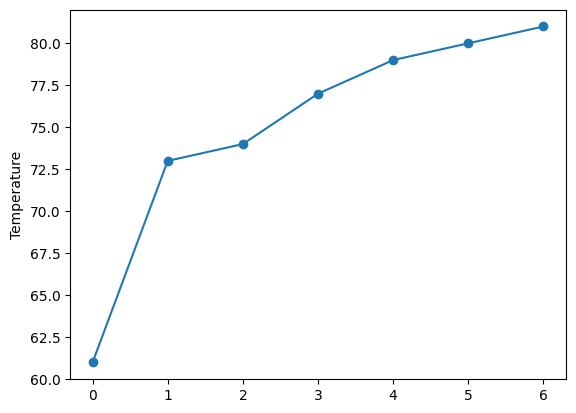

In [24]:
measurements.sort()
number_of_days = measurements.size
plt.plot(range(number_of_days), measurements)
plt.scatter(range(number_of_days), measurements)
plt.ylabel('Temperature')
plt.show()

In [25]:
# Finding the midpoint temperature
difference = measurements.max() - measurements.min()
midpoint = measurements.min() + difference / 2
assert midpoint == (measurements.max() + measurements.min()) / 2
print(f'The midpoint temperature is {midpoint} degrees')

The midpoint temperature is 71.0 degrees


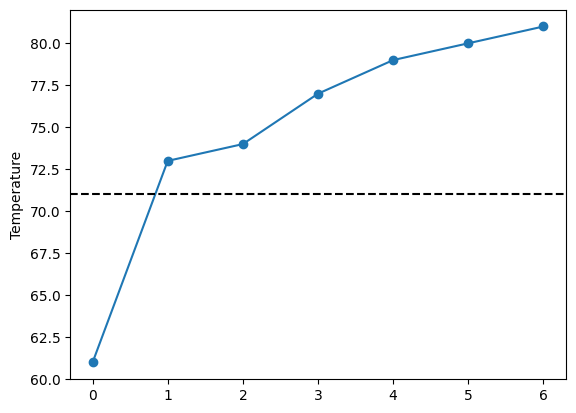

In [26]:
# Plotting the midpoint temperature
plt.plot(range(number_of_days), measurements)
plt.scatter(range(number_of_days), measurements)
plt.axhline(midpoint, color='k', linestyle='--')
plt.ylabel('Temperature')
plt.show()

The median temperature is 77 degrees


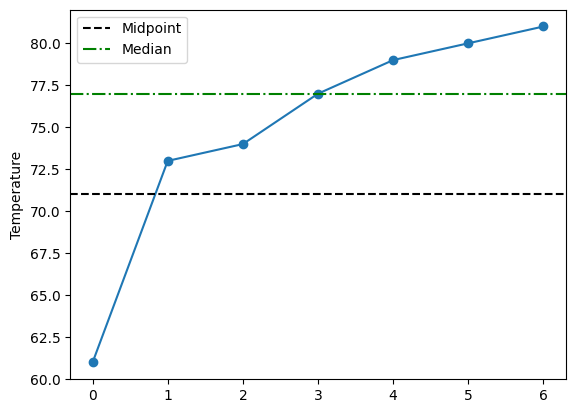

In [27]:
# Plotting the median temperature
median = measurements[3]
print(f'The median temperature is {median} degrees')
plt.plot(range(number_of_days), measurements)
plt.scatter(range(number_of_days), measurements)
plt.axhline(midpoint, color='k', linestyle='--', label='Midpoint')
plt.axhline(median, color='g', linestyle='-.', label='Median')
plt.legend()
plt.ylabel('Temperature')
plt.show()

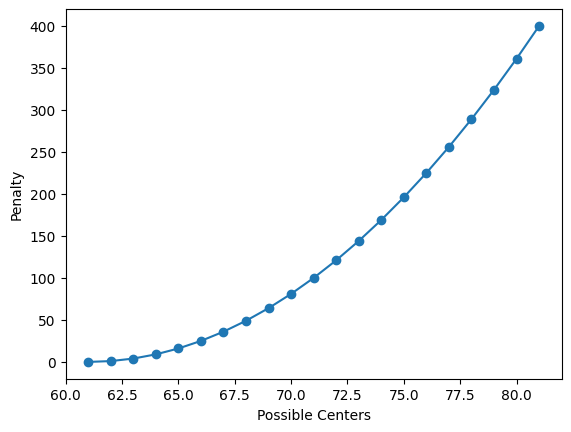

In [28]:
# The median split is not well-balanced, since it's closer to the upper three temps in the plot.
# Balance the split by penalizing the median from being too far from the minimum. 
# Implement the penalty using squared distance. 
# If we penalize our central value based on its distance from 61, the squared penalty grows noticeably for higher values. 

def squared_distance(value1, value2): return (value1 - value2) ** 2 

possible_centers = range(measurements.min(), measurements.max() + 1) # Min and max measured temps
penalties = [squared_distance(center, measurements.min()) for center in possible_centers]
plt.plot(possible_centers, penalties)
plt.scatter(possible_centers, penalties)
plt.xlabel('Possible Centers')
plt.ylabel('Penalty')
plt.show()

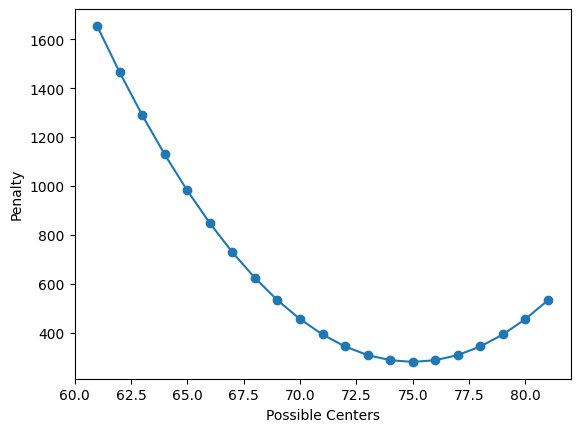

In [29]:
# As centers shift toward 61, the penalty drops but the distance to the remaining measurements increases. 
# We ought to penalize each potential center based on its squared distance to all seven measurements. 
# Therefore, we penalize based on total sum of squared distances

def sum_of_squared_distances(value, measurements):
    return sum(squared_distance(value, m) for m in measurements)

penalties = [sum_of_squared_distances(center, measurements) for center in possible_centers]
plt.plot(possible_centers, penalties)
plt.scatter(possible_centers, penalties)
plt.xlabel('Possible Centers')
plt.ylabel('Penalty')
plt.show()

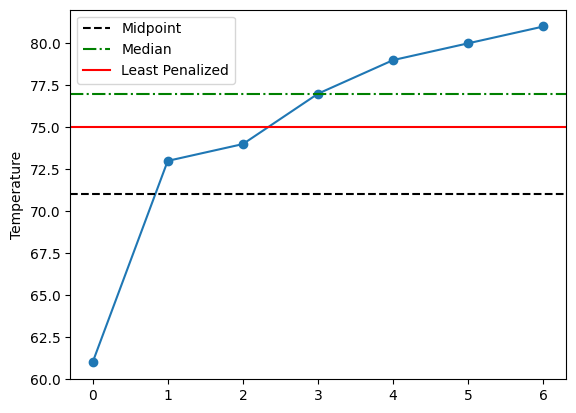

In [32]:
# We can call 75 the "least-penalized center". 
least_penalized = 75
assert least_penalized == possible_centers[np.argmin(penalties)] # np.argmin returns the index of the minimum value in an array

plt.plot(range(number_of_days), measurements)
plt.scatter(range(number_of_days), measurements)
plt.axhline(midpoint, color='k', linestyle='--', label='Midpoint')
plt.axhline(median, color='g', linestyle='-.', label='Median')
plt.axhline(least_penalized, color='r', linestyle='-', label='Least Penalized')
plt.legend()
plt.ylabel('Temperature')
plt.show()

In [35]:
# Sum-of-squared-distances error is always minimized by the average value of a dataset. 
# Compute the least-penalized center using the arithmetic mean. 

assert measurements.sum() / measurements.size == least_penalized

In [36]:
mean = measurements.mean()
assert mean == least_penalized
assert mean == np.mean(measurements)
assert mean == np.average(measurements)

In [38]:
# `np.average` is different from `np.mean` because it takes an optional `weights` parameter. 
# `weights` is a list of numeric weights that capture the importance of the measurements relative to each other.
# `weights` is useful for computing the mean across duplicate measurements

equal_weights = [1] * 7
assert mean == np.average(measurements, weights=equal_weights)

unequal_weights = [100] + [1] * 6
assert mean != np.average(measurements, weights=unequal_weights)